### PCA eigenface
### Olivetti 데이터 

Olivetti 데이터셋은 얼굴 인식과 관련된 작업에 사용되는 공개 데이터셋 중 하나입니다. 

이 데이터셋에는 40명의 사람들에 대한 400개의 흑백 얼굴 이미지가 포함되어 있습니다.

 각 사람당 10개의 이미지가 있으며, 각 이미지는 64x64 픽셀의 크기를 가지고 있습니다.

Olivetti 데이터셋은 사람들의 얼굴을 다양한 표정과 조명 조건에서 찍은 이미지로 구성되어 있습니다. 이 데이터셋은 컴퓨터 비전 분야에서 얼굴 인식, 표정 인

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
print(faces_all.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [3]:
K = 20
faces = faces_all.images[faces_all.target == K]


In [4]:
faces

array([[[0.5165289 , 0.5123967 , 0.5082645 , ..., 0.42975205,
         0.42561984, 0.41735536],
        [0.5082645 , 0.5123967 , 0.5206612 , ..., 0.42975205,
         0.42975205, 0.4214876 ],
        [0.4876033 , 0.5123967 , 0.5289256 , ..., 0.4338843 ,
         0.42975205, 0.42975205],
        ...,
        [0.3305785 , 0.44214877, 0.45041323, ..., 0.55785125,
         0.5495868 , 0.5413223 ],
        [0.35123968, 0.4338843 , 0.446281  , ..., 0.54545456,
         0.55785125, 0.55785125],
        [0.33471075, 0.4338843 , 0.44214877, ..., 0.56198347,
         0.55785125, 0.5661157 ]],

       [[0.23553719, 0.35123968, 0.4338843 , ..., 0.45867768,
         0.446281  , 0.47107437],
        [0.21900827, 0.36363637, 0.4338843 , ..., 0.46694216,
         0.44214877, 0.46694216],
        [0.2520661 , 0.35123968, 0.4338843 , ..., 0.47933885,
         0.45041323, 0.46280992],
        ...,
        [0.3966942 , 0.5041322 , 0.62396693, ..., 0.21900827,
         0.07024793, 0.07024793],
        [0.5

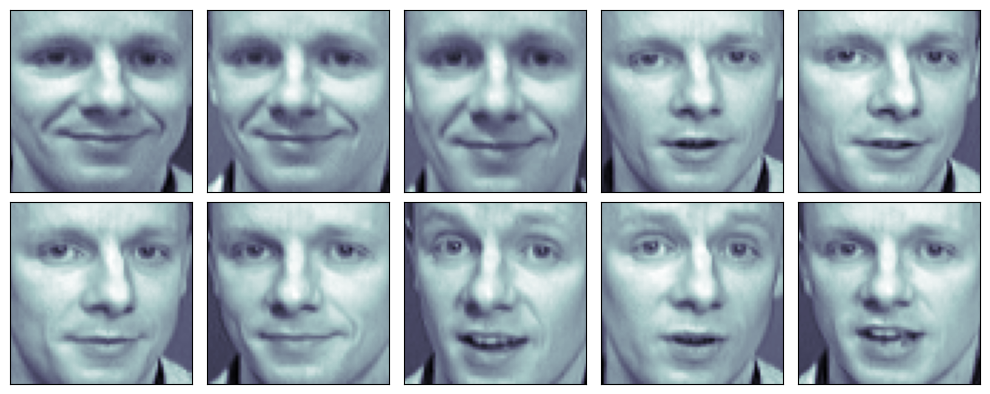

In [6]:
import matplotlib.pyplot as plt

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(faces[n], cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.tight_layout()
plt.show()


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = faces_all.data[faces_all.target == K]

In [8]:
X.shape

(10, 4096)

In [12]:
import numpy as np

np.sqrt(4096) # 64 * 64 픽셀 

64.0

In [14]:
X[0].shape

(4096,)

In [15]:
W = pca.fit_transform(X)
W.shape

(10, 2)

In [16]:
W # 10장의 사진을 표현하는 벡터 

array([[-2.2136743 ,  4.2135134 ],
       [ 2.2680879 ,  3.7376182 ],
       [ 0.65999216,  3.1209512 ],
       [-1.7500471 , -1.4096608 ],
       [-3.396379  , -1.5552862 ],
       [-3.3355844 , -1.7309353 ],
       [ 3.3851442 , -2.1805704 ],
       [ 3.9338176 , -1.5998874 ],
       [-3.209437  , -1.2286725 ],
       [ 3.6580772 , -1.3670672 ]], dtype=float32)

In [17]:
X_inv = pca.inverse_transform(W)
X_inv.shape

(10, 4096)

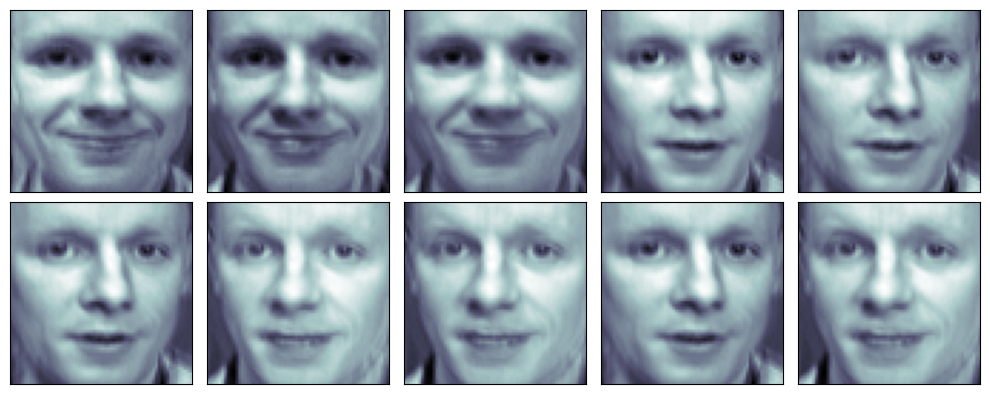

In [18]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(X_inv[n].reshape(64, 64), cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])

plt.tight_layout()
plt.show()


In [19]:
face_mean = pca.mean_.reshape(64, 64)
face_p1 = pca.components_[0].reshape(64, 64)
face_p2 = pca.components_[1].reshape(64, 64)

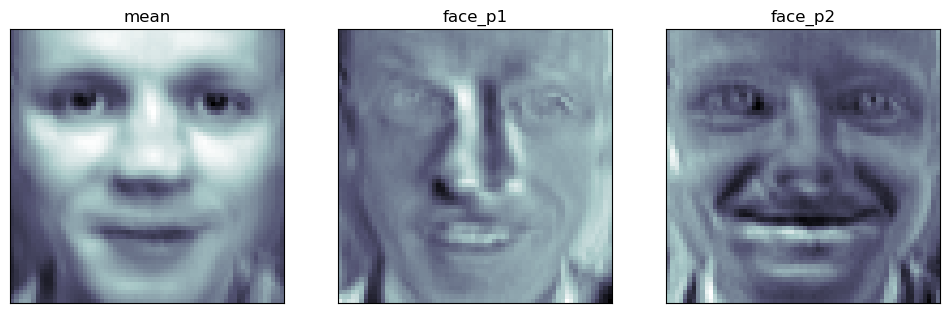

In [21]:
plt.figure(figsize=(12,7))
plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('mean')
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_p1')
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False); plt.xticks([]); plt.yticks([]); plt.title('face_p2')

plt.show()

#### 가중치 선정 

In [23]:
import numpy as np 

N = 2
M = 5
w = np.linspace(-5, 10, N*M)

#### face p1 성분 변화

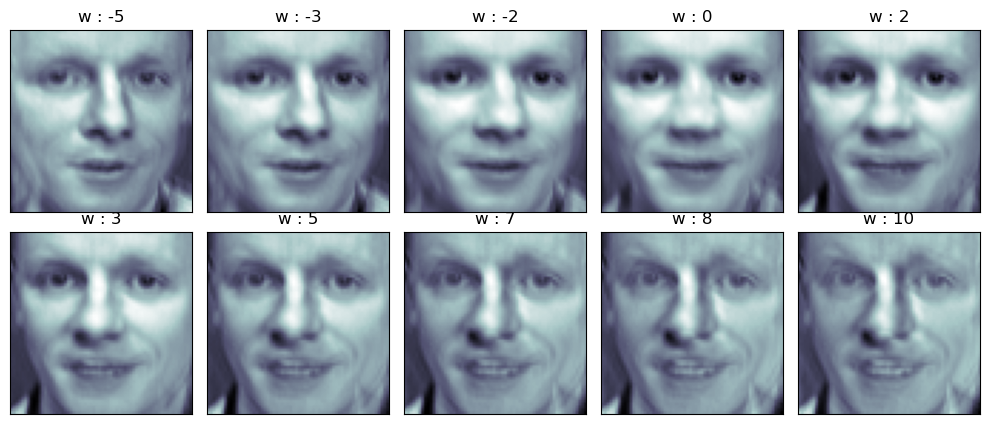

In [24]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n]*face_p1, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('w : '+str(round(w[n])))

plt.tight_layout()
plt.show()

### face p2 성분 변화

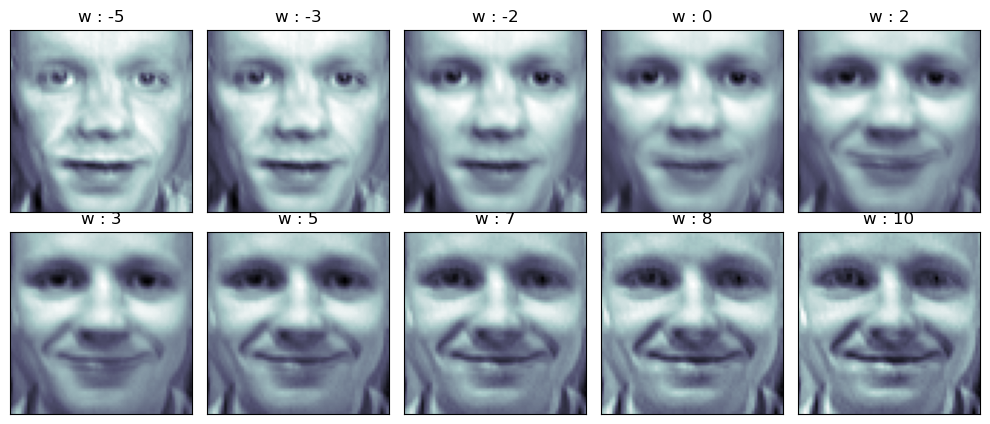

In [25]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w[n]*face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('w : '+str(round(w[n])))

plt.tight_layout()
plt.show()

### 두 개의 성분 다 표현하기

In [26]:
nx,ny = (5,5)
x = np.linspace(-5, 8, nx)
y = np.linspace(-5, 8, ny)

w1, w2 = np.meshgrid(x, y)


In [27]:
w1.shape

(5, 5)

In [28]:
w1 = w1.reshape(-1,)
w2 = w2.reshape(-1,)
w1.shape

(25,)

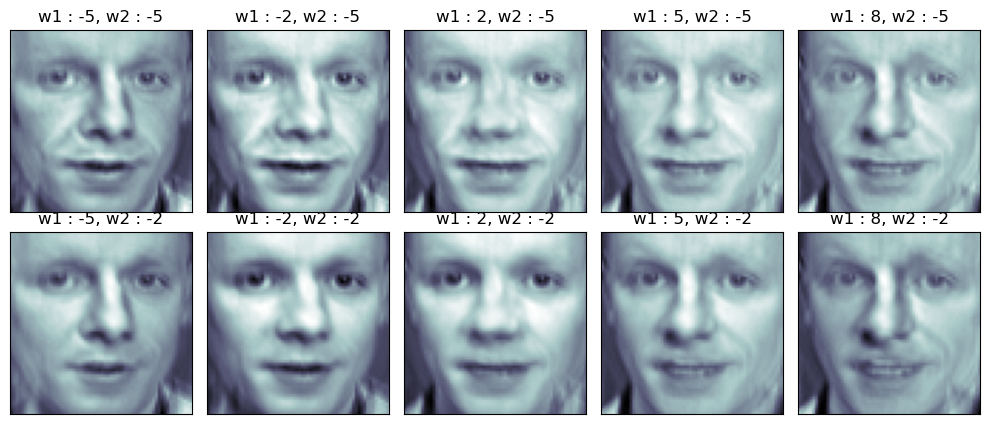

In [31]:
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace=0, wspace=0.05)
for n in range(N*M):
    ax = fig.add_subplot(N, M, n+1)
    ax.imshow(face_mean + w1[n]*face_p1 +w2[n]*face_p2, cmap=plt.cm.bone)
    ax.grid(False)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    plt.title('w1 : '+str(round(w1[n]))+', w2 : '+str(round(w2[n])))

plt.tight_layout()
plt.show()